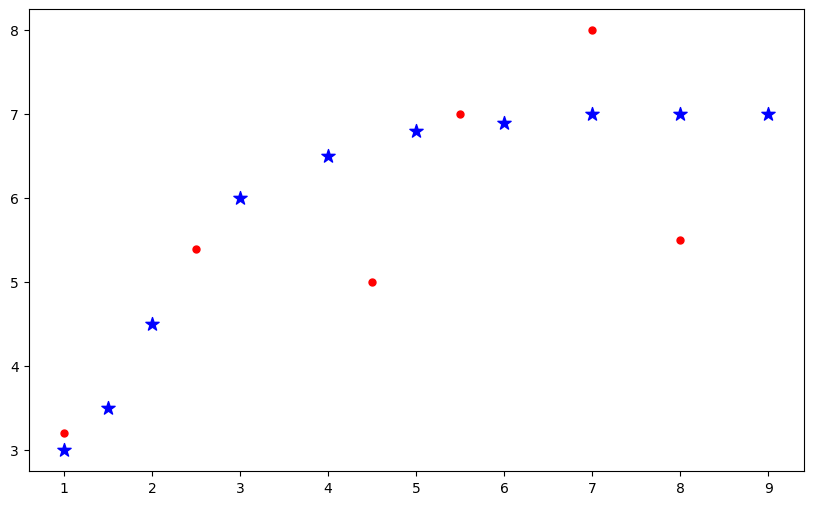

In [12]:
# import library
import numpy as np
import matplotlib.pyplot as plt

# create dataset for training polynomial regression model
x_tran = np.array([1, 1.5, 2, 3, 4, 5, 6, 7, 8, 9])
y_tran = np.array([3, 3.5, 4.5, 6, 6.5, 6.8, 6.9, 7, 7, 7])

# craete a testing data
x_test = np.array([1, 2.5, 4.5, 5.5, 7, 8])
y_test = np.array([3.2, 5.4, 5, 7, 8, 5.5])

# plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(x_tran, y_tran, marker='*', s=100, label='Training Data',color='b')
plt.scatter(x_test, y_test, marker='.', s=100, label='Testing Data', color='r')
plt.show()


In [13]:
x_tran = x_tran.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [14]:
# using linear regression model
class LinearRegression:
    def __init__(self, l_rate=0.001, iterations=10000 ,degree=1):
        self.l_rate = l_rate
        self.iterations = iterations
        self.degree = 1

    def scale(self, x):
        x_scaled = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
        return x_scaled

    def fit(self, x, y):
        self.cost = []
        self.theta = np.zeros((1 + x.shape[1]))
        n = x.shape[0]
        x = self.scale(x)

        for i in range(self.iterations):
            y_pred = self.theta[0] + np.dot(x, self.theta[1:])
            mse = 1 / n * np.sum((y_pred - y) ** 2)
            self.cost.append(mse)

            # derivative of cost function
            d_theta1 = 2 / n * np.dot(x.T, (y_pred - y))
            d_theta0 = 2 / n * np.sum(y_pred - y)

            # update thetas
            self.theta[1:] -= self.l_rate * d_theta1
            self.theta[0] -= self.l_rate * d_theta0

        return self

    def predict(self, x):
        x = self.scale(x)
        y_pred = self.theta[0] + np.dot(x, self.theta[1:])
        return y_pred

In [15]:
# fiting data point using linear regression model
lr = LinearRegression()
lr.fit(x_tran,y_tran)
lr.theta

array([5.81999999, 1.27652313])

In [17]:
# predict the traning exaple through linear regression model
y_pred = lr.predict(x_tran)

In [18]:
# compute the mean square error
mse = (1/x_tran.shape[0]) * np.sum((y_pred - y_tran)**2)
rmse = np.sqrt(mse) # root mean square error

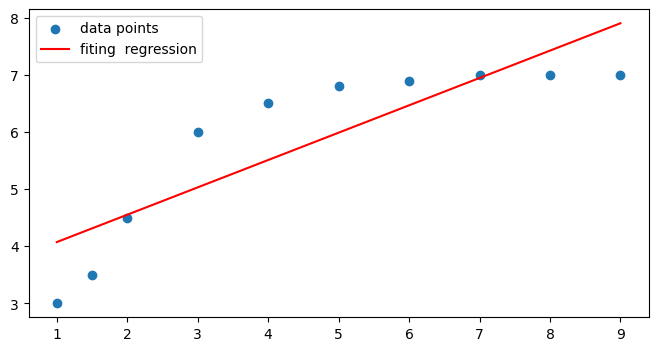

rmse:  0.7470533455929121


In [19]:
# ploting the linear regression model
plt.figure(figsize=(8,4))
plt.scatter(x_tran,y_tran,label='data points')
plt.plot(x_tran,y_pred, color='red', label='fiting  regression')
plt.legend(loc="upper left")
plt.show()
print("rmse: ", rmse)

In [45]:
class PolyLinearRegression:
    def __init__(self, l_rate=0.001, iterations=10000, degree=2,lamda_value=0.09):
        self.l_rate = l_rate
        self.iterations = iterations
        self.degree = degree
        self.lamda_value = lamda_value

    def scale(self, x):
        x_scaled = x - np.mean(x, axis=0)
        x_scaled = x_scaled / np.std(x_scaled, axis=0)
        return x_scaled
    
    def transformer(self, x):
        self.n = x.shape[0]
        x_transformed = np.empty((self.n, 0))  # 2D array
        for j in range(self.degree + 1):
            if j != 0:
                x_power = np.power(x, j)
                x_transformed = np.append(x_transformed, x_power, axis=1)
        return x_transformed
    
    def fit(self, x, y):
        self.cost = []
        self.theta = np.zeros((1 + self.degree))  # one dimension for bias

        x = self.scale(x)
        x_p = self.transformer(x)

        for i in range(self.iterations):
            y_pred = np.dot(x_p, self.theta[1:]) + self.theta[0]  # Corrected the calculation
            l2 = self.lamda_value * np.sum(np.square(self.theta[1:]))
            mse = 1 / self.n * np.sum((y_pred - y) ** 2)+l2
            self.cost.append(mse)

            # derivative of cost function
            d_theta1 = 2 / self.n * np.dot(x_p.T, (y_pred - y))-l2
            d_theta0 = 2 / self.n * np.sum(y_pred - y)

            # update thetas
            self.theta[1:] -= self.l_rate * d_theta1
            self.theta[0] -= self.l_rate * d_theta0

        return self
    
    def prediction(self, x):
        x = self.scale(x)
        x_p = self.transformer(x)

        return np.dot(x_p, self.theta[1:]) + self.theta[0]  # Corrected the calculation


In [46]:
plr = PolyLinearRegression()
plr.fit(x_tran,y_tran)

In [47]:
plr.transformer(x_tran)

array([[ 1.  ,  1.  ],
       [ 1.5 ,  2.25],
       [ 2.  ,  4.  ],
       [ 3.  ,  9.  ],
       [ 4.  , 16.  ],
       [ 5.  , 25.  ],
       [ 6.  , 36.  ],
       [ 7.  , 49.  ],
       [ 8.  , 64.  ],
       [ 9.  , 81.  ]])

In [48]:
plr.theta

array([ 6.50998643,  1.51862971, -0.69393584])

In [49]:
y_pred_poly = plr.prediction(x_tran)

In [50]:
mse_tran = (1/x_tran.shape[0]) * np.sum((y_pred_poly - y_tran)**2)
mse_test = (1/x_test.shape[0]) * np.sum((plr.prediction(x_test) - y_test)**2)

rmse_tran = np.sqrt(mse_tran) # root mean square error
rmse_test = np.sqrt(mse_test) # root mean square error

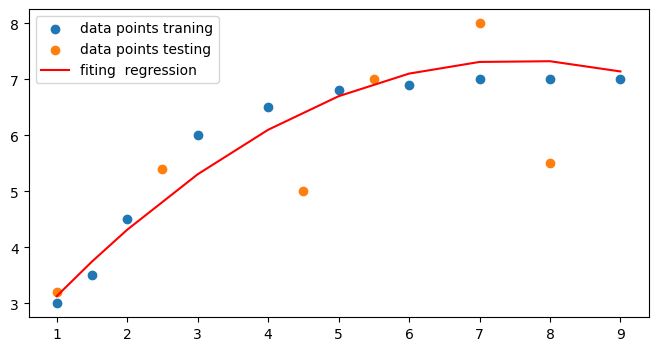

rmse tran:  0.32061140856558806
rmse: test  1.0640339627786473


In [51]:
# ploting the result
plt.figure(figsize=(8,4))
plt.scatter(x_tran,y_tran,label='data points traning')
plt.scatter(x_test,y_test,label='data points testing')
plt.plot(x_tran,y_pred_poly, color='red', label='fiting  regression')
plt.legend(loc="upper left")
plt.show()

print("rmse tran: ", rmse_tran)
print("rmse: test ", rmse_test)
